In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [50]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
covid_df = pd.read_csv(url, index_col=0)

In [51]:
covid_df

,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
UID,,,,,,,,,,,,,,,,,,,,,
84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",...,19732,19759,19759,19759,19759,19759,19759,19759,19790,19790
84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",...,69641,69767,69767,69767,69767,69767,69767,69767,69860,69860
84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",...,7451,7474,7474,7474,7474,7474,7474,7474,7485,7485
84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",...,8067,8087,8087,8087,8087,8087,8087,8087,8091,8091
84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",...,18616,18673,18673,18673,18673,18673,18673,18673,18704,18704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",...,12130,12130,12130,12130,12130,12130,12130,12134,12134,12134
84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",...,6401,6401,6401,6401,6401,6401,6401,6406,6406,6406
84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,"Unassigned, Wyoming, US",...,0,0,0,0,0,0,0,0,0,0


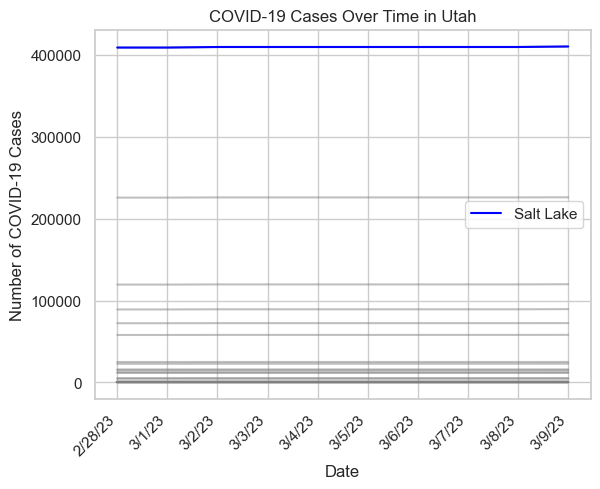

In [54]:
#Question 1
import pandas as pd
import matplotlib.pyplot as plt

SLcounty = 'Salt Lake'

utah_df = covid_df[covid_df['Province_State'] == 'Utah']

date_columns = ['2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23', '3/7/23', '3/8/23', '3/9/23']

plt.plot(utah_df[date_columns].T, color='grey', alpha=0.5)

SLcounty_data = utah_df[utah_df['Admin2'] == SLcounty][date_columns].values.flatten()
plt.plot(date_columns, SLcounty_data, color='blue', label=SLcounty)

plt.xticks(rotation=45, ha='right')

plt.xlabel('Date')
plt.ylabel('Number of COVID-19 Cases')
plt.title('COVID-19 Cases Over Time in Utah')
plt.legend()

plt.show()

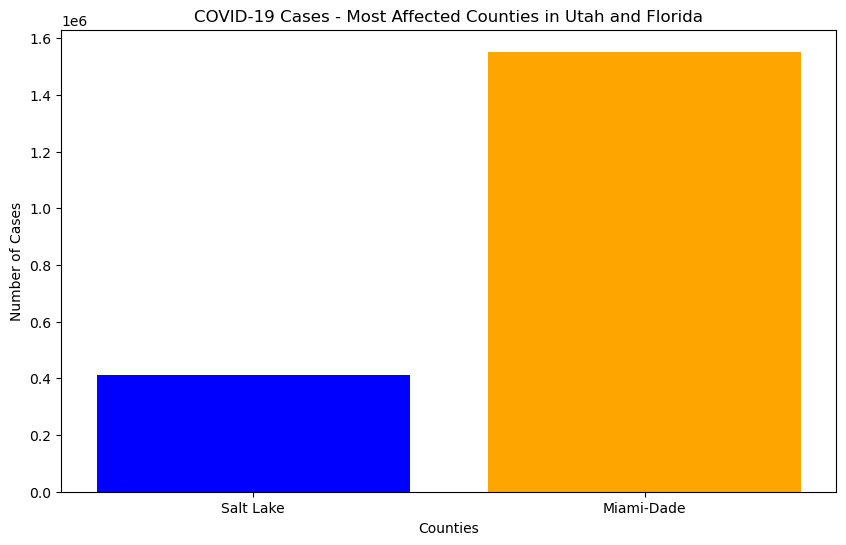

In [33]:
#Question 2
import pandas as pd
import matplotlib.pyplot as plt

utah_data = covid_df[covid_df['Province_State'] == 'Utah']
column_utah = utah_data.select_dtypes(include='number')
utah_most_cases_county = utah_data.loc[column_utah.sum(axis=1).idxmax()]

florida_data = covid_df[covid_df['Province_State'] == 'Florida']
column_florida = florida_data.select_dtypes(include='number')
florida_most_cases_county = florida_data.loc[column_florida.sum(axis=1).idxmax()]

plt.figure(figsize=(10, 6))
plt.bar([utah_most_cases_county['Admin2'], florida_most_cases_county['Admin2']],
        [utah_most_cases_county.iloc[11:].max(), florida_most_cases_county.iloc[11:].max()],
        color=['blue', 'orange'])

plt.title('COVID-19 Cases - Most Affected Counties in Utah and Florida')
plt.ylabel('Number of Cases')
plt.xlabel('Counties')
plt.show()

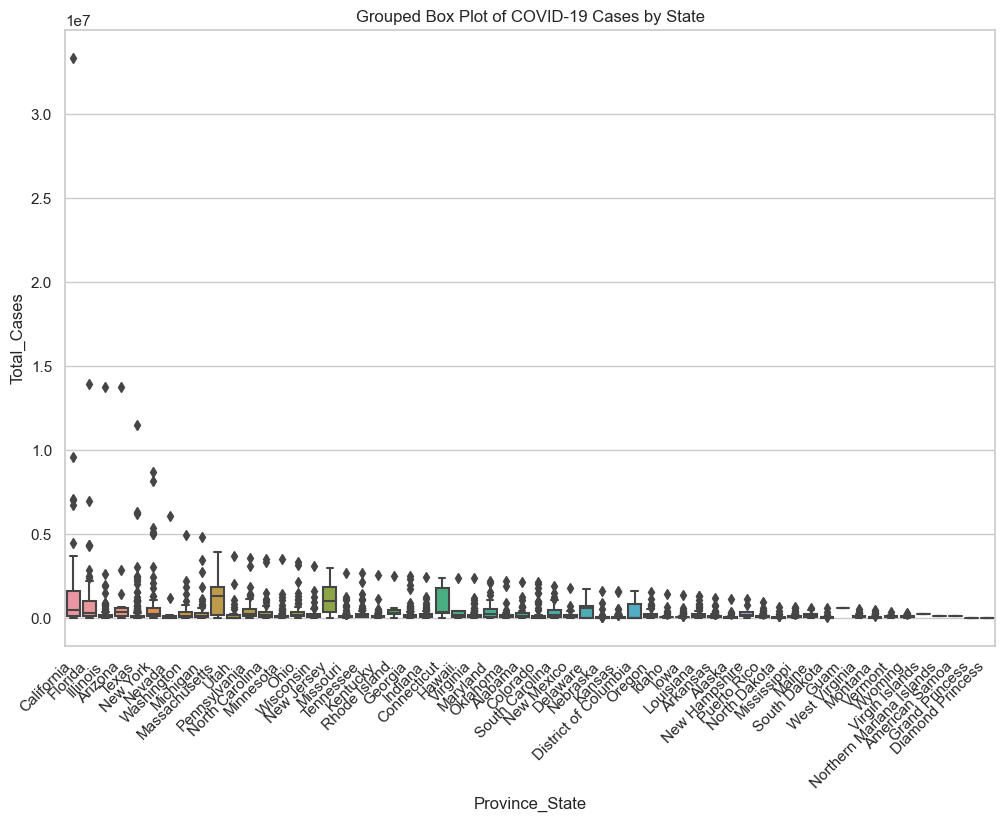

In [55]:
#Extra Credit
date_columns = ["2/28/23", "3/1/23", "3/2/23", "3/3/23", "3/4/23", "3/5/23", "3/6/23", "3/7/23", "3/8/23"]
covid_df[date_columns] = covid_df[date_columns].astype(int)

covid_df['Total_Cases'] = covid_df[date_columns].sum(axis=1)

ordered_states = covid_df.groupby('Province_State')['Total_Cases'].max().sort_values(ascending=False).index

plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
sns.boxplot(x='Province_State', y='Total_Cases', data=covid_df, order=ordered_states)
plt.xticks(rotation=45, ha='right')
plt.title('Grouped Box Plot of COVID-19 Cases by State')
plt.show()